# Build a song recommender system

In [2]:
import turicreate

# Load some music data

In [3]:
song_data = turicreate.SFrame('song_data.sframe/')

# Explore our data

In [4]:
song_data

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


## Show the most popular songs in the dataset

In [5]:
song_data['song'].show()

Materializing SArray

# Count the number of unique users in the data

In [6]:
users = song_data['user_id'].unique()

In [7]:
len(users)

66346

# Create a song recommender

In [8]:
train_data,test_data = song_data.random_split(.8,seed=0)

## Create a very simple popularity recommender

In [9]:
popularity_model = turicreate.popularity_recommender.create(train_data,
                                                           user_id = 'user_id',
                                                           item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 3.97006s

893580 observations to process; with 9952 unique items.

## Use the popularity model to make some predictions

In [10]:
popularity_model.recommend(users=[users[0]])

user_id,song,score,rank
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Sehr kosmisch - Harmonia,4754.0,1
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Undo - Björk,4227.0,2
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,You're The One - DwightYoakam ...,3781.0,3
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Revelry - Kings Of Leon,3527.0,4
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,5
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Secrets - OneRepublic,3148.0,6
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Hey_ Soul Sister - Train,2538.0,7
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Fireflies - CharttraxxKaraoke ...,2532.0,8
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Tive Sim - Cartola,2521.0,9
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Drop The World - LilWayne / Eminem ...,2053.0,10


In [11]:
popularity_model.recommend(users=[users[1]])

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Sehr kosmisch - Harmonia,4754.0,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Undo - Björk,4227.0,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,You're The One - DwightYoakam ...,3781.0,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Revelry - Kings Of Leon,3527.0,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Secrets - OneRepublic,3148.0,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Fireflies - CharttraxxKaraoke ...,2532.0,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Tive Sim - Cartola,2521.0,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Drop The World - LilWayne / Eminem ...,2053.0,10


# Build a recommender with personalization

In [12]:
personalized_model = turicreate.item_similarity_recommender.create(train_data,
                                                                  user_id = 'user_id',
                                                                  item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 4.88151s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.562ms                        | 1.5        |

| 238.874ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.24s                               | 0                | 0               |

| 5.47s                               | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 6.83109s

## Apply personalized model to make song recommendations

In [13]:
personalized_model.recommend(users=[users[0]])

user_id,song,score,rank
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Fantasy - The xx,0.037720016811204994,1
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Walk In The Park - BeachHouse ...,0.02976011970768804,2
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Lover Of Mine - BeachHouse ...,0.02731569176134856,3
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Used To Be - Beach House,0.025831634583680527,4
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Norway - Beach House,0.021929393643918244,5
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Take Care - Beach House,0.02157930446707684,6
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Paper Gangsta - Lady GaGa,0.01974896762682044,7
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Real Love - Beach House,0.019548221774723217,8
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Beautiful_ Dirty_ Rich -Lady GaGa ...,0.019116710061612335,9
b048033af070b5dbb18d5d0e5f334c9390611b04 ...,Boys Boys Boys - LadyGaGa ...,0.0190747302511464,10


In [14]:
personalized_model.recommend(users=[users[1]])

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Cuando Pase El Temblor -Soda Stereo ...,0.019450453611520622,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Fireflies - CharttraxxKaraoke ...,0.014473731701190654,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Love Is A Losing Game -Amy Winehouse ...,0.014286596041459303,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Marry Me - Train,0.014133471709031325,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Secrets - OneRepublic,0.013591665488023024,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Sehr kosmisch - Harmonia,0.013398789442502536,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Te Hacen Falta Vitaminas- Soda Stereo ...,0.01293028317964994,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,OMG - Usher featuringwill.i.am ...,0.012777828253232516,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Y solo se me ocurreamarte (Unplugged) - ...,0.012341127945826603,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,No Dejes Que... -Caifanes ...,0.012104249917543851,10


# Apply model to find similar songs in the data set

In [15]:
personalized_model.get_similar_items(['With Or Without You - U2'])

song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.04285717010498047,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.033734917640686035,2
With Or Without You - U2,Window In The Skies - U2,0.03283584117889404,3
With Or Without You - U2,Vertigo - U2,0.03007519245147705,4
With Or Without You - U2,Sunday Bloody Sunday - U2,0.02713179588317871,5
With Or Without You - U2,Bad - U2,0.02517986297607422,6
With Or Without You - U2,A Day Without Me - U2,0.023715436458587646,7
With Or Without You - U2,Another Time AnotherPlace - U2 ...,0.020325183868408203,8
With Or Without You - U2,Walk On - U2,0.020202040672302246,9
With Or Without You - U2,Get On Your Boots - U2,0.019685029983520508,10


In [16]:
personalized_model.get_similar_items(['Chan Chan (Live) - Buena Vista Social Club'])

song,similar,score,rank
Chan Chan (Live) - BuenaVista Social Club ...,Murmullo - Buena VistaSocial Club ...,0.1881188154220581,1
Chan Chan (Live) - BuenaVista Social Club ...,La Bayamesa - Buena VistaSocial Club ...,0.1871921420097351,2
Chan Chan (Live) - BuenaVista Social Club ...,Amor de Loca Juventud -Buena Vista Social Club ...,0.18483412265777588,3
Chan Chan (Live) - BuenaVista Social Club ...,Diferente - Gotan Project,0.021459221839904785,4
Chan Chan (Live) - BuenaVista Social Club ...,Mistica - Orishas,0.020576119422912598,5
Chan Chan (Live) - BuenaVista Social Club ...,Hotel California - GipsyKings ...,0.019304990768432617,6
Chan Chan (Live) - BuenaVista Social Club ...,Nací Orishas - Orishas,0.019157111644744873,7
Chan Chan (Live) - BuenaVista Social Club ...,Gitana - Willie Colon,0.018796980381011963,8
Chan Chan (Live) - BuenaVista Social Club ...,Le Moulin - Yann Tiersen,0.018796980381011963,9
Chan Chan (Live) - BuenaVista Social Club ...,Criminal - Gotan Project,0.018779337406158447,10


# Compare the models quantitatively
We now formally compare the popularity and the personalized models using precision-recall curves. 

In [17]:
model_performance = turicreate.recommender.util.compare_models(test_data, [popularity_model, personalized_model], user_sample=.05)

compare_models: using 2931 users to estimate model performance
PROGRESS: Evaluate model M0


recommendations finished on 1000/2931 queries. users per second: 925.114

recommendations finished on 2000/2931 queries. users per second: 941.178


Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.030706243602865932 | 0.00792636606352061  |
|   2    | 0.028488570453770044 | 0.01683942692131024  |
|   3    | 0.025929716820197894 | 0.022644910720652795 |
|   4    | 0.023541453428863882 | 0.02679105742053542  |
|   5    | 0.021562606618901435 | 0.030096367530890972 |
|   6    | 0.01995905834186284  | 0.034003831801712465 |
|   7    | 0.019008626992250362 | 0.03772392989233259  |
|   8    | 0.017954622995564655 | 0.04037744510981914  |
|   9    | 0.017513931536449475 | 0.04370641645312005  |
|   10   | 0.016854315933128673 | 0.04680506635320292  |
+--------+----------------------+----------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/2931 queries. users per second: 661.187

recommendations finished on 2000/2931 queries. users per second: 643.998


Precision and recall summary statistics by cutoff
+--------+---------------------+---------------------+
| cutoff |    mean_precision   |     mean_recall     |
+--------+---------------------+---------------------+
|   1    | 0.19140225179119755 | 0.06112995021493425 |
|   2    | 0.16052541794609346 | 0.09676326047721073 |
|   3    |  0.1410212669168658 | 0.12286133172625437 |
|   4    | 0.12563971340839306 |  0.1440055335383172 |
|   5    | 0.11470487888092812 |  0.1619787788258195 |
|   6    | 0.10496986239053789 | 0.17638343525964684 |
|   7    | 0.09611541648389145 |  0.1880280877563976 |
|   8    | 0.09049812350733552 | 0.20020256696004796 |
|   9    | 0.08578793737442669 | 0.21334556189679935 |
|   10   | 0.08116683725690887 | 0.22351076251747604 |
+--------+---------------------+---------------------+
[10 rows x 3 columns]



The table shows that the personalized model provides much better performance.

In [18]:
import matplotlib.pyplot as plt

In [19]:
model_performance = turicreate.recommender.util.compare_models(test_data, [popularity_model, personalized_model], user_sample=.05)

compare_models: using 2931 users to estimate model performance
PROGRESS: Evaluate model M0


recommendations finished on 1000/2931 queries. users per second: 921.095

recommendations finished on 2000/2931 queries. users per second: 854.6


Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.027976799727055607 | 0.007512833843437734 |
|   2    | 0.027806209484817487 | 0.014913577835788675 |
|   3    | 0.024110087569657664 | 0.019574732292234873 |
|   4    | 0.022688502217673167 | 0.02371394101179159  |
|   5    | 0.02067553735926309  | 0.027077953510911554 |
|   6    | 0.019333560786989615 | 0.03028069678530275  |
|   7    | 0.018911146853828577 | 0.03481800336969228  |
|   8    | 0.018039918116683703 | 0.038431550253454065 |
|   9    | 0.017248568937412383 | 0.04132968892436654  |
|   10   | 0.016342545206414223 | 0.04359665600709617  |
+--------+----------------------+----------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/2931 queries. users per second: 803.709

recommendations finished on 2000/2931 queries. users per second: 763.101


Precision and recall summary statistics by cutoff


+--------+---------------------+---------------------+
| cutoff |    mean_precision   |     mean_recall     |
+--------+---------------------+---------------------+
|   1    | 0.18764926646195848 | 0.06381918102747178 |
|   2    | 0.15336062777209158 | 0.09843097546526415 |
|   3    | 0.13510747185261007 | 0.12381656782885045 |
|   4    | 0.12009553053565336 | 0.14274357035360094 |
|   5    | 0.10999658819515525 | 0.16097523159959204 |
|   6    | 0.10093255999090192 | 0.17542360024448034 |
|   7    |  0.0946044743383535 |   0.19036893770773  |
|   8    | 0.08904810644831111 | 0.20452035738627353 |
|   9    | 0.08510557640547405 | 0.21817054585734227 |
|   10   | 0.07952917093142275 | 0.22473526227364513 |
+--------+---------------------+---------------------+
[10 rows x 3 columns]



In [47]:
pr0 = model_performance[0]['precision_recall_overall'].select_columns(['precision', 'recall'])
pr1 = model_performance[1]['precision_recall_overall'].select_columns(['precision', 'recall'])

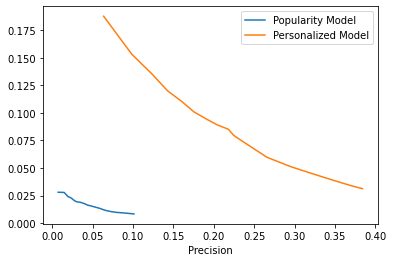

In [52]:
plt.plot(pr0['recall'], pr0['precision'], label='Popularity Model')
plt.plot(pr1['recall'], pr1['precision'], label='Personalized Model')
plt.xlabel("Recall")
plt.xlabel("Precision")
plt.legend()

In [63]:
users_Kanye_West = song_data[song_data['artist']=='Kanye West']['user_id'].unique()
users_Foo_Fighters = song_data[song_data['artist']=='Foo Fighters']['user_id'].unique()
users_Taylor_Swift = song_data[song_data['artist']=='Taylor Swift']['user_id'].unique()
users_Lady_GaGa = song_data[song_data['artist']=='Lady GaGa']['user_id'].unique()

In [64]:
print("Number of unique users listening to Kanye West are " + str(len(users_Kanye_West)))
print("Number of unique users listening to Foo Fighters are " + str(len(users_Foo_Fighters)))
print("Number of unique users listening to Taylor Swift are " + str(len(users_Taylor_Swift)))
print("Number of unique users listening to Lady GaGa are " + str(len(users_Lady_GaGa)))

Number of unique users listening to Kanye West are 2522
Number of unique users listening to Foo Fighters are 2055
Number of unique users listening to Taylor Swift are 3246
Number of unique users listening to Lady GaGa are 2928


In [76]:
artist_popularity = song_data.groupby('artist', operations={'total_count': turicreate.aggregate.SUM('listen_count')})

In [77]:
artist_popularity.sort('total_count', ascending=False)

artist,total_count
Kings Of Leon,43218
Dwight Yoakam,40619
Björk,38889
Coldplay,35362
Florence + The Machine,33387
Justin Bieber,29715
Alliance Ethnik,26689
OneRepublic,25754
Train,25402
The Black Keys,22184


In [78]:
artist_popularity.sort('total_count', ascending=True)

artist,total_count
William Tabbert,14
Reel Feelings,24
Beyoncé feat. Bun B andSlim Thug ...,26
Diplo,30
Boggle Karaoke,30
harvey summers,31
Nâdiya,36
Kanye West / Talib Kweli/ Q-Tip / Common / ...,38
Jody Bernal,38
Aneta Langerova,38


In [69]:
sub_test_data = test_data['user_id'].unique()[0:10000]

In [73]:
sub_test_data_recommendations = personalized_model.recommend(sub_test_data, k=1)

recommendations finished on 1000/10000 queries. users per second: 1089.2

recommendations finished on 2000/10000 queries. users per second: 968.605

recommendations finished on 3000/10000 queries. users per second: 968.045

recommendations finished on 4000/10000 queries. users per second: 932.971

recommendations finished on 5000/10000 queries. users per second: 936.551

recommendations finished on 6000/10000 queries. users per second: 952.556

recommendations finished on 7000/10000 queries. users per second: 960.054

recommendations finished on 8000/10000 queries. users per second: 972.829

recommendations finished on 9000/10000 queries. users per second: 975.483

recommendations finished on 10000/10000 queries. users per second: 977.337

In [75]:
sub_test_data_recommendations.groupby('song', operations={'COUNT' : turicreate.aggregate.COUNT()}).sort('COUNT', ascending=False)

song,COUNT
Undo - Björk,453
Secrets - OneRepublic,375
Revelry - Kings Of Leon,227
You're The One - DwightYoakam ...,166
Fireflies - CharttraxxKaraoke ...,127
Hey_ Soul Sister - Train,107
Horn Concerto No. 4 in Eflat K495: II. Romance ...,96
Sehr kosmisch - Harmonia,84
OMG - Usher featuringwill.i.am ...,71
U Smile - Justin Bieber,48
